# Households
This notebook calculates the ETLocal keys of the Households section. 

TODO: add mermaid chart to describe how this notebook is structured (what goes in and what comes out, flows, ...)

## Import modules

In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import Image, display
import importlib


import src.load_data_manager
import src.transform
import src.yaml_calculator
import src.helper
from src.load_data_manager import LoadDataManager
import config.yaml_to_diagram
from config.yaml_to_diagram import create_dependency_diagram

# Reload the modules to ensure latest version is used
importlib.reload(src.transform);
importlib.reload(src.yaml_calculator);
importlib.reload(src.helper);
importlib.reload(src.load_data_manager);
importlib.reload(config.yaml_to_diagram);

## General

Here we configure the notebook so that all contextual information is loaded and present for the other sections.

TODO: define list with ETLocal keys for which to run this notebook

Give this list as optional argument to helper functions so that if False for a key, then it is not updated in the template.

### Parameters

We first specify general parameters to be used throughout this notebook.

In [2]:
# Select the parent data set. Make sure to use the geo ID. It should be existing in the Dataset Manager.
parent = "nl"

# Specify the year and the reference year for the ETM
year = 2023
year_etm = 2019

# Specify the CSV-separator (presumably either "," or ";")
sep=","

# Specify where the dependency graphs are stored
dep_graph_folder = Path("config","etlocal_keys_final_demand_dependency_outputs", "output")

# Specify where the yaml files with calculation rules are stored
yaml_folder = Path("config","yaml_files_for_etlocal_key_calculation")

## Extract and Transform

In this section:
- We *Load* the relevant data from the data/intermediate folder
- We *Combine* the relevant data by merging municipal and national data

This is handled by the **ETLocalDataModule** which provides a unified interface for all data operations.

The module loads the following data sources:
- The ETLocal template (ETLocal_template_empty.csv)
- Klimaatmonitor data - both municipal and national levels with metadata:
  - km_source_data_converted.csv (municipal data)
  - km_meta_data_converted.csv (municipal metadata)
  - km_national_source_data_converted.csv (national data)
  - km_national_meta_data_converted.csv (national metadata)
- Transport research data (transport_research_cleaned.csv)
- Miscellaneous data (miscellaneous_data_analysis.csv)
- ETM query results (etm_query_combined.csv)

The module:
- Combines municipal-level data from different sources
- Combines national-level data from different sources
- Merges the municipal and national datasets into a single DataFrame
- Caches loaded data for improved performance

In [3]:
data_manager = LoadDataManager(sep=sep)

df_template_local = data_manager.load_template(group='households')

# Load and combine all data sources
df_input_vars = data_manager.combine_all_data(
    include_miscellaneous=True,
    include_etm_queries=True,
    include_electric_cars=False
)

## Energy demand

##### Gas demand

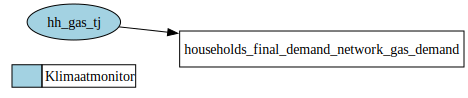

In [4]:
# Define ETLocal key
etlocal_key = "households_final_demand_network_gas_demand"
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Describe output key for the commit message by describing the last step:

Read the information for the commit message from the image and write them down to generate the commit message.

In [5]:
sector = 'households'
output_description = 'Final gas demand'
arithmetic_op= 'multiply'
vars_description = ['total gas use in m<sup>3</sup>']
vars_source = ['Klimaatmonitor']

# message = src.helper.generate_commit_message(output_description,arithmetic_op,vars_description,sector,year,vars_source)
message = "Final gas demand in the household sector is based on total gas use in m<sup>3</sup> (Klimaatmonitor, 2023)."
print(message)

Final gas demand in the household sector is based on total gas use in m<sup>3</sup> (Klimaatmonitor, 2023).


In [6]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline

,households_final_demand_network_gas_demand,error_message,commit
GM0014,2839.005,NaN,Final gas demand in the household sector is ba...
GM0034,838.725,NaN,Final gas demand in the household sector is ba...
GM0037,474.750,NaN,Final gas demand in the household sector is ba...
GM0047,411.450,NaN,Final gas demand in the household sector is ba...
GM0050,183.570,NaN,Final gas demand in the household sector is ba...
...,...,...,...
GM1979,693.135,NaN,Final gas demand in the household sector is ba...
GM1980,803.910,NaN,Final gas demand in the household sector is ba...
GM1982,1152.060,NaN,Final gas demand in the household sector is ba...
GM1991,724.785,NaN,Final gas demand in the household sector is ba...


In [7]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_energy_demand,TJ,2839.005,Final gas demand in the household sector is ba...
GM0034,households,households_energy_demand,TJ,838.725,Final gas demand in the household sector is ba...
GM0037,households,households_energy_demand,TJ,474.750,Final gas demand in the household sector is ba...
GM0047,households,households_energy_demand,TJ,411.450,Final gas demand in the household sector is ba...
GM0050,households,households_energy_demand,TJ,183.570,Final gas demand in the household sector is ba...
...,...,...,...,...,...
GM1979,households,households_energy_demand,TJ,693.135,Final gas demand in the household sector is ba...
GM1980,households,households_energy_demand,TJ,803.910,Final gas demand in the household sector is ba...
GM1982,households,households_energy_demand,TJ,1152.060,Final gas demand in the household sector is ba...


In [8]:
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")

key: households_final_demand_network_gas_demand
total_rows: 342
zero_count: 0
nan_count: 0
min_value: 15.825
max_value: 8482.2
mean_value: 582.3785087719299
median_value: 411.45


In [9]:
verification_results = src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: households_final_demand_network_gas_demand
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  large_diff: 338 municipalities (100.0%)

 VALUE STATISTICS:
  Template:     Min=15.82, Max=8482.20, Mean=578.90
  Verification: Min=22.16, Max=10526.79, Mean=795.55
  Abs diff:     Min=6.33, Max=2044.59, Mean=216.89

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0363: Template=8482.20, Verification=10526.79, Diff=2044.59 (-19.4%)
  Municipality GM0518: Template=5899.56, Verification=7713.1

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


##### Heat demand

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

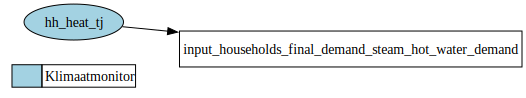

In [11]:
etlocal_key = 'input_households_final_demand_steam_hot_water_demand'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

In [12]:
sector = 'households'
output_description = 'Final heat demand'
arithmic_op= 'multiply'
vars_description = ['total heat use']
vars_source = ['Klimaatmonitor']


# message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
message = "Final heat demand in the household sector is based on total heat use (Klimaatmonitor, 2023)."
print(message)

Final heat demand in the household sector is based on total heat use (Klimaatmonitor, 2023).


2. Calculate etlocal_key values
- *Action*: assign the output name from the image to `ivar`.

In [13]:

df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline


,input_households_final_demand_steam_hot_water_demand,error_message,commit
GM0014,89.0,NaN,Final heat demand in the household sector is b...
GM0034,1365.0,NaN,Final heat demand in the household sector is b...
GM0037,1.0,NaN,Final heat demand in the household sector is b...
GM0047,0.0,NaN,Final heat demand in the household sector is b...
GM0050,50.0,NaN,Final heat demand in the household sector is b...
...,...,...,...
GM1979,0.0,NaN,Final heat demand in the household sector is b...
GM1980,89.0,NaN,Final heat demand in the household sector is b...
GM1982,4.0,NaN,Final heat demand in the household sector is b...
GM1991,0.0,NaN,Final heat demand in the household sector is b...


3. Add data to template.

In [14]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_energy_demand,TJ,89.0,Final heat demand in the household sector is b...
GM0034,households,households_energy_demand,TJ,1365.0,Final heat demand in the household sector is b...
GM0037,households,households_energy_demand,TJ,1.0,Final heat demand in the household sector is b...
GM0047,households,households_energy_demand,TJ,0.0,Final heat demand in the household sector is b...
GM0050,households,households_energy_demand,TJ,50.0,Final heat demand in the household sector is b...
...,...,...,...,...,...
GM1979,households,households_energy_demand,TJ,0.0,Final heat demand in the household sector is b...
GM1980,households,households_energy_demand,TJ,89.0,Final heat demand in the household sector is b...
GM1982,households,households_energy_demand,TJ,4.0,Final heat demand in the household sector is b...


4. Validate data using quick-scan function.

In [15]:
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")

key: input_households_final_demand_steam_hot_water_demand
total_rows: 342
zero_count: 161
nan_count: 0
min_value: 0.0
max_value: 1365.0
mean_value: 30.43859649122807
median_value: 1.0


In [16]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: input_households_final_demand_steam_hot_water_demand
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  exact_match: 169 municipalities (50.0%)
  large_diff: 103 municipalities (30.5%)
  small_diff: 58 municipalities (17.2%)
  medium_diff: 8 municipalities (2.4%)

 VALUE STATISTICS:
  Template:     Min=0.00, Max=1365.00, Mean=30.52
  Verification: Min=0.00, Max=1825.00, Mean=45.45
  Abs diff:     Min=0.00, Max=774.00, Mean=16.92

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0363: 

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:379: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  / comparison["verification_value"].replace(0, float("inf"))
/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0363,1051.0,1825,774.0,-42.410959,large_diff
GM0599,1120.0,1692,572.0,-33.806147,large_diff
GM0344,995.0,1479,484.0,-32.724814,large_diff
GM0356,141.0,561,420.0,-74.866310,large_diff
GM0855,558.0,967,409.0,-42.295760,large_diff
...,...,...,...,...,...
GM0189,0.0,0,0.0,0.000000,exact_match
GM0784,0.0,0,0.0,0.000000,exact_match
GM0180,1.0,1,0.0,0.000000,exact_match
GM0797,0.0,0,0.0,0.000000,exact_match


##### Biomass demand

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

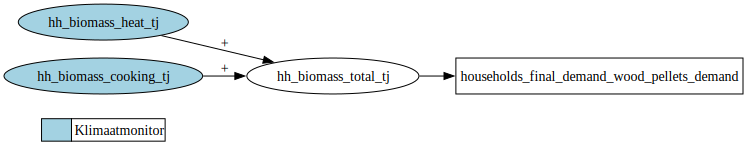

In [17]:
etlocal_key = 'households_final_demand_wood_pellets_demand'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

In [18]:
sector = 'households'
output_description = 'Final biomass demand'
arithmic_op= 'add'
vars_description = ['total biomass use for heat', 'total biomass use for cooking']
vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


# message = src.helper.generate_commit_message(output_description,arithmic_op,vars_description,sector,year,vars_source)
message = "Final biomass demand in the household sector is calculated by adding total biomass use for heat (Klimaatmonitor, 2023) by the total biomass use for cooking (Klimaatmonitor, 2023).”"
print(message)

Final biomass demand in the household sector is calculated by adding total biomass use for heat (Klimaatmonitor, 2023) by the total biomass use for cooking (Klimaatmonitor, 2023).”


2. Calculate etlocal_key values
- *Action*: assign the output name from the image to `ivar`.

In [19]:

df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline


,households_final_demand_wood_pellets_demand,hh_biomass_total_tj,error_message,commit
GM0014,123.0,123.0,NaN,Final biomass demand in the household sector i...
GM0034,121.0,121.0,NaN,Final biomass demand in the household sector i...
GM0037,61.0,61.0,NaN,Final biomass demand in the household sector i...
GM0047,46.0,46.0,NaN,Final biomass demand in the household sector i...
GM0050,25.0,25.0,NaN,Final biomass demand in the household sector i...
...,...,...,...,...
GM1979,93.0,93.0,NaN,Final biomass demand in the household sector i...
GM1980,84.0,84.0,NaN,Final biomass demand in the household sector i...
GM1982,163.0,163.0,NaN,Final biomass demand in the household sector i...
GM1991,75.0,75.0,NaN,Final biomass demand in the household sector i...


3. Add data to template.

In [20]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_energy_demand,TJ,123.0,Final biomass demand in the household sector i...
GM0034,households,households_energy_demand,TJ,121.0,Final biomass demand in the household sector i...
GM0037,households,households_energy_demand,TJ,61.0,Final biomass demand in the household sector i...
GM0047,households,households_energy_demand,TJ,46.0,Final biomass demand in the household sector i...
GM0050,households,households_energy_demand,TJ,25.0,Final biomass demand in the household sector i...
...,...,...,...,...,...
GM1979,households,households_energy_demand,TJ,93.0,Final biomass demand in the household sector i...
GM1980,households,households_energy_demand,TJ,84.0,Final biomass demand in the household sector i...
GM1982,households,households_energy_demand,TJ,163.0,Final biomass demand in the household sector i...


4. Validate data using quick-scan function.

In [21]:
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")

key: households_final_demand_wood_pellets_demand
total_rows: 342
zero_count: 0
nan_count: 0
min_value: 2.0
max_value: 187.0
mean_value: 47.18421052631579
median_value: 40.0


In [22]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: households_final_demand_wood_pellets_demand
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  large_diff: 201 municipalities (59.5%)
  medium_diff: 111 municipalities (32.8%)
  exact_match: 25 municipalities (7.4%)
  small_diff: 1 municipalities (0.3%)

 VALUE STATISTICS:
  Template:     Min=2.00, Max=187.00, Mean=46.56
  Verification: Min=2.00, Max=198.00, Mean=46.94
  Abs diff:     Min=0.00, Max=74.00, Mean=9.25

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1708: Template=84.00

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1708,84.0,10,74.0,740.000000,large_diff
GM0855,102.0,34,68.0,200.000000,large_diff
GM0086,73.0,6,67.0,1116.666667,large_diff
GM1581,78.0,13,65.0,500.000000,large_diff
GM1730,75.0,18,57.0,316.666667,large_diff
...,...,...,...,...,...
GM0716,43.0,43,0.0,0.000000,exact_match
GM1901,37.0,37,0.0,0.000000,exact_match
GM0317,10.0,10,0.0,0.000000,exact_match
GM0848,29.0,29,0.0,0.000000,exact_match


##### Electricity demand

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

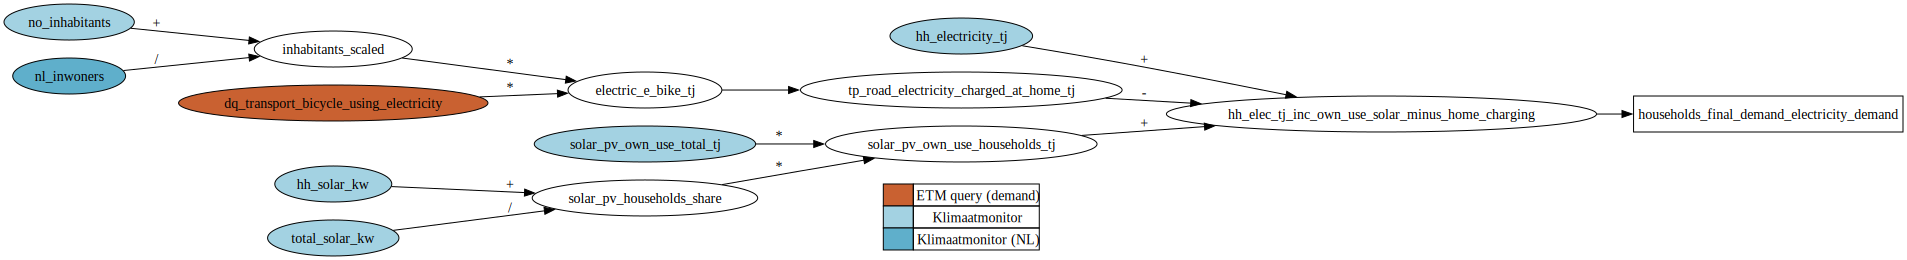

In [23]:
etlocal_key = 'households_final_demand_electricity_demand'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

In [24]:
sector = 'households'
output_description = 'Final electricity demand'
arithmic_op= 'add'
vars_description = ['total residental electricity use', 'electricity used for e-bike charging', 'rooftop solar electricity used directly in the home']
vars_source = ['Klimaatmonitor', 'Klimaatmonitor, CBS, estimation Quintel', 'Klimaatmonitor']


# message = f"{output_description} in the {sector} sector is based on {vars_description[0]} ({vars_source[0]}, {year}), excluding {vars_description[1]} ({vars_source[1]}, {year}) and including {vars_description[2]} ({vars_source[2]}, {year})"
print(message)
message = "“Final electricity demand in the households sector is based on total residential electricity use (Klimaatmonitor, 2023), excluding electricity used for e-bike charging (Klimaatmonitor, CBS, estimation Quintel, 2023) and including rooftop solar electricity used directly in the home (Klimaatmonitor, 2023)”"

Final biomass demand in the household sector is calculated by adding total biomass use for heat (Klimaatmonitor, 2023) by the total biomass use for cooking (Klimaatmonitor, 2023).”


2. Calculate etlocal_key values
- *Action*: assign the output name from the image to `ivar`.

In [25]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline

,households_final_demand_electricity_demand,inhabitants_scaled,electric_e_bike_tj,solar_pv_households_share,solar_pv_own_use_households_tj,hh_elec_tj_inc_own_use_solar_minus_home_charging,error_message,commit
GM0014,933.675382,0.013371,0.101156,0.481427,90.296537,933.675382,NaN,“Final electricity demand in the households se...
GM0034,926.468365,0.012510,0.094647,0.505317,95.323012,926.468365,NaN,“Final electricity demand in the households se...
GM0037,145.668799,0.001804,0.013650,0.133716,9.242448,145.668799,NaN,“Final electricity demand in the households se...
GM0047,128.312433,0.001550,0.011730,0.343238,18.164163,128.312433,NaN,“Final electricity demand in the households se...
GM0050,98.076041,0.001330,0.010063,0.159406,9.526104,98.076041,NaN,“Final electricity demand in the households se...
...,...,...,...,...,...,...,...,...
GM1979,226.706830,0.002549,0.019282,0.273007,23.686112,226.706830,NaN,“Final electricity demand in the households se...
GM1980,406.470574,0.004996,0.037797,0.552270,69.188371,406.470574,NaN,“Final electricity demand in the households se...
GM1982,477.940728,0.005133,0.038833,0.431326,80.899561,477.940728,NaN,“Final electricity demand in the households se...
GM1991,310.689618,0.003309,0.025033,0.473656,54.394651,310.689618,NaN,“Final electricity demand in the households se...


3. Add the data to the template.

In [26]:

df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_energy_demand,TJ,933.675382,“Final electricity demand in the households se...
GM0034,households,households_energy_demand,TJ,926.468365,“Final electricity demand in the households se...
GM0037,households,households_energy_demand,TJ,145.668799,“Final electricity demand in the households se...
GM0047,households,households_energy_demand,TJ,128.312433,“Final electricity demand in the households se...
GM0050,households,households_energy_demand,TJ,98.076041,“Final electricity demand in the households se...
...,...,...,...,...,...
GM1979,households,households_energy_demand,TJ,226.706830,“Final electricity demand in the households se...
GM1980,households,households_energy_demand,TJ,406.470574,“Final electricity demand in the households se...
GM1982,households,households_energy_demand,TJ,477.940728,“Final electricity demand in the households se...


4. Validate data using quick-scan function.

In [27]:
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")

key: households_final_demand_electricity_demand
total_rows: 342
zero_count: 0
nan_count: 0
min_value: 5.587439334762985
max_value: 3197.2751780380895
mean_value: 233.32596504912732
median_value: 161.25358702793352


In [28]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: households_final_demand_electricity_demand
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 226 municipalities (66.9%)
  large_diff: 86 municipalities (25.4%)
  small_diff: 26 municipalities (7.7%)

 VALUE STATISTICS:
  Template:     Min=5.59, Max=3197.28, Mean=231.48
  Verification: Min=5.31, Max=3134.39, Mean=219.76
  Abs diff:     Min=0.02, Max=93.24, Mean=12.67

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0344: Template=1354.47, Verification=1261.23, Diff=93.24

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0344,1354.470765,1261.230373,93.240392,7.392812,medium_diff
GM0772,1065.899908,997.681169,68.218738,6.837729,medium_diff
GM0363,3197.275178,3134.388581,62.886597,2.006343,medium_diff
GM0034,926.468365,863.694006,62.774358,7.268125,medium_diff
GM0439,404.306713,350.557186,53.749527,15.332599,large_diff
...,...,...,...,...,...
GM0088,5.587439,5.30807,0.279369,5.263101,medium_diff
GM0321,217.156301,217.428382,0.272081,-0.125136,small_diff
GM0642,192.176141,192.391891,0.21575,-0.112141,small_diff
GM0798,79.868009,79.987316,0.119307,-0.149157,small_diff


##### Coal demand

 Since there is no coal demand in households in the Netherlands, this will be set to zero for all municipalities

In [29]:
# Set coal demand to zero for all municipalities
etlocal_key = 'households_final_demand_coal_demand'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 0, df_template_local)
3
# Validate the result
validation_results = src.helper.validate_template_data(df_template_local, etlocal_key)
print(f"Validation results: {validation_results}")


Validation results: {'key': 'households_final_demand_coal_demand', 'total_rows': 342, 'zero_count': 342, 'nan_count': 0, 'min_value': 0.0, 'max_value': 0.0, 'mean_value': 0.0, 'median_value': 0.0}


##### Oil demand

 Since there is no coal demand in households in the Netherlands, this will be set to zero for all municipalities

In [30]:
# Set oil demand to zero for all municipalities
etlocal_key = 'input_households_final_demand_crude_oil_demand'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 0, df_template_local)

# Validate the result
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")


key: input_households_final_demand_crude_oil_demand
total_rows: 342
zero_count: 342
nan_count: 0
min_value: 0.0
max_value: 0.0
mean_value: 0.0
median_value: 0.0


##### Solar thermal demand

 Since there is no solar thermal demand registered in households in the Netherlands, this will be set to zero for all municipalities

In [31]:
# Set oil demand to zero for all municipalities
etlocal_key = 'households_final_demand_solar_thermal_demand'
df_template_local = src.helper.fill_template_with_uniform_value_etlocal_data(etlocal_key, 0, df_template_local)

# Validate the result
for key, value in src.helper.validate_template_data(df_template_local, etlocal_key).items():
    print(f"{key}: {value}")


key: households_final_demand_solar_thermal_demand
total_rows: 342
zero_count: 342
nan_count: 0
min_value: 0.0
max_value: 0.0
mean_value: 0.0
median_value: 0.0


## Energy production

### Solar PV production

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

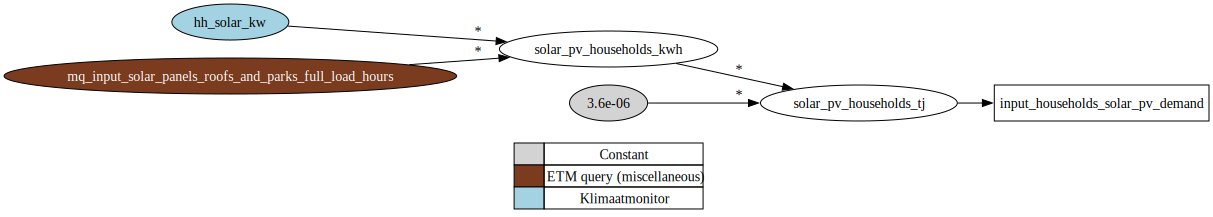

In [32]:
etlocal_key = 'input_households_solar_pv_demand'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [33]:
# sector = 'buildings'
# output_description = 'Final biomass demand'
# arithmic_op= 'add'
# vars_description = ['total biomass demand in ', 'total gas demand in commercial buildings']
# vars_source = ['Klimaatmonitor', 'Klimaatmonitor']


# message = CommitMessage(output_description,arithmic_op,vars_description,sector,year,vars_source)
# print(message)
# message = f"The solar PV production in the households sector is based on the registered capacity of solar PV systems installed on residential buildings (Klimaatmonitor, {year})."
message = "The solar PV production in the household sector is based on the registered capacity of solar PV systems installed on residential buildings (Klimaatmonitor, 2023)."
message

'The solar PV production in the household sector is based on the registered capacity of solar PV systems installed on residential buildings (Klimaatmonitor, 2023).'

2. Calculate etlocal_key values

In [34]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline


,input_households_solar_pv_demand,solar_pv_households_kwh,solar_pv_households_tj,error_message,commit
GM0014,381.64464,106012400.0,381.64464,NaN,The solar PV production in the household secto...
GM0034,384.66792,106852200.0,384.66792,NaN,The solar PV production in the household secto...
GM0037,86.44734,24013150.0,86.44734,NaN,The solar PV production in the household secto...
GM0047,79.83990,22177750.0,79.83990,NaN,The solar PV production in the household secto...
GM0050,63.14688,17540800.0,63.14688,NaN,The solar PV production in the household secto...
...,...,...,...,...,...
GM1979,137.62422,38228950.0,137.62422,NaN,The solar PV production in the household secto...
GM1980,224.95734,62488150.0,224.95734,NaN,The solar PV production in the household secto...
GM1982,285.17328,79214800.0,285.17328,NaN,The solar PV production in the household secto...
GM1991,181.08900,50302500.0,181.08900,NaN,The solar PV production in the household secto...


3. Add data to template

In [35]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_energy_supply,TJ,381.64464,The solar PV production in the household secto...
GM0034,households,households_energy_supply,TJ,384.66792,The solar PV production in the household secto...
GM0037,households,households_energy_supply,TJ,86.44734,The solar PV production in the household secto...
GM0047,households,households_energy_supply,TJ,79.83990,The solar PV production in the household secto...
GM0050,households,households_energy_supply,TJ,63.14688,The solar PV production in the household secto...
...,...,...,...,...,...
GM1979,households,households_energy_supply,TJ,137.62422,The solar PV production in the household secto...
GM1980,households,households_energy_supply,TJ,224.95734,The solar PV production in the household secto...
GM1982,households,households_energy_supply,TJ,285.17328,The solar PV production in the household secto...


4. Use validation function to quick-scan data

In [36]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'input_households_solar_pv_demand',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 2.6675999999999997,
 'max_value': 455.02758,
 'mean_value': 103.80312,
 'median_value': 83.83958999999999}

In [37]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: input_households_solar_pv_demand
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  large_diff: 338 municipalities (100.0%)

 VALUE STATISTICS:
  Template:     Min=2.67, Max=455.03, Mean=102.45
  Verification: Min=0.87, Max=100.64, Mean=24.14
  Abs diff:     Min=1.66, Max=355.64, Mean=78.31

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0344: Template=455.03, Verification=99.39, Diff=355.64 (357.8%)
  Municipality GM0772: Template=420.83, Verification=100.64, Diff=320.19 (318.2%)
 

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0344,455.02758,99.39,355.63758,357.820284,large_diff
GM0772,420.83442,100.64,320.19442,318.158207,large_diff
GM0363,413.18046,94.66,318.52046,336.488971,large_diff
GM0855,391.31982,73.67,317.64982,431.179340,large_diff
GM0034,384.66792,79.3,305.36792,385.079344,large_diff
...,...,...,...,...,...
GM0060,9.95562,2.68,7.27562,271.478358,large_diff
GM0093,10.45494,3.56,6.89494,193.678090,large_diff
GM0277,6.36462,1.19,5.17462,434.842017,large_diff
GM0096,3.22506,0.87,2.35506,270.696552,large_diff


## Housing stock

### Number of inhabitants

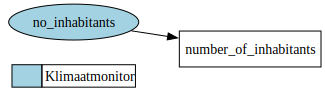

In [38]:
etlocal_key = 'number_of_inhabitants'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [39]:
message = "Number of inhabitants, directly retrieved from Klimaatmonitor (2023)."

2. Calculate etlocal_key values

In [40]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline


,number_of_inhabitants,error_message,commit
GM0014,238147.0,NaN,"Number of inhabitants, directly retrieved from..."
GM0034,222825.0,NaN,"Number of inhabitants, directly retrieved from..."
GM0037,32135.0,NaN,"Number of inhabitants, directly retrieved from..."
GM0047,27616.0,NaN,"Number of inhabitants, directly retrieved from..."
GM0050,23692.0,NaN,"Number of inhabitants, directly retrieved from..."
...,...,...,...
GM1979,45394.0,NaN,"Number of inhabitants, directly retrieved from..."
GM1980,88985.0,NaN,"Number of inhabitants, directly retrieved from..."
GM1982,91423.0,NaN,"Number of inhabitants, directly retrieved from..."
GM1991,58934.0,NaN,"Number of inhabitants, directly retrieved from..."


3. Add data to template

In [41]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_housing_stock,#,238147.0,"Number of inhabitants, directly retrieved from..."
GM0034,households,households_housing_stock,#,222825.0,"Number of inhabitants, directly retrieved from..."
GM0037,households,households_housing_stock,#,32135.0,"Number of inhabitants, directly retrieved from..."
GM0047,households,households_housing_stock,#,27616.0,"Number of inhabitants, directly retrieved from..."
GM0050,households,households_housing_stock,#,23692.0,"Number of inhabitants, directly retrieved from..."
...,...,...,...,...,...
GM1979,households,households_housing_stock,#,45394.0,"Number of inhabitants, directly retrieved from..."
GM1980,households,households_housing_stock,#,88985.0,"Number of inhabitants, directly retrieved from..."
GM1982,households,households_housing_stock,#,91423.0,"Number of inhabitants, directly retrieved from..."


4. Use validation function to quick-scan data

In [42]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'number_of_inhabitants',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 982.0,
 'max_value': 918117.0,
 'mean_value': 52079.79824561404,
 'median_value': 32504.5}

In [43]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: number_of_inhabitants
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  medium_diff: 278 municipalities (82.2%)
  small_diff: 54 municipalities (16.0%)
  large_diff: 6 municipalities (1.8%)

 VALUE STATISTICS:
  Template:     Min=982.00, Max=918117.00, Mean=51769.24
  Verification: Min=936.00, Max=862965.00, Mean=50148.53
  Abs diff:     Min=13.00, Max=55152.00, Mean=1648.98

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM0363: Template=918117.00, Verification=862965.00, Diff=55152

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM0363,918117.0,862965,55152.0,6.390989,medium_diff
GM0518,562839.0,537833,25006.0,4.649399,medium_diff
GM0599,663900.0,644618,19282.0,2.991229,medium_diff
GM0344,367947.0,352866,15081.0,4.273860,medium_diff
GM0034,222825.0,207904,14921.0,7.176870,medium_diff
...,...,...,...,...,...
GM0589,10232.0,10201,31.0,0.303892,small_diff
GM0928,45620.0,45642,22.0,-0.048201,small_diff
GM0893,13119.0,13140,21.0,-0.159817,small_diff
GM0406,41252.0,41273,21.0,-0.050881,small_diff


### Roof surface area available for PV

1. Generate image

- *Action*: assign the corresponding `etlocal_key`

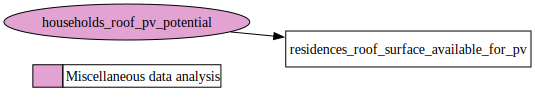

In [44]:
etlocal_key = 'residences_roof_surface_available_for_pv'
# Create and display the dependency diagram
diagram = create_dependency_diagram(etlocal_key,
                                   yaml_dir="config/yaml_files_for_etlocal_key_calculation",
                                   save_files=False,
                                   output_dir="config")
diagram

Read information for the commit message

In [45]:
message = "Total roof surface area with ‘woonfunctie’ according to the BAG (Atlas van de Leefomgeving, 2021) https://www.atlasleefomgeving.nl/platte-daken-in-nederland-bag."


3. A

2. Calculate etlocal_key values

In [46]:
df_pipeline = src.helper.generate_etlocal_key(etlocal_key,df_input_vars=df_input_vars)
df_pipeline['commit'] = message
df_pipeline


,residences_roof_surface_available_for_pv,error_message,commit
GM0014,5.914107,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM0034,5.056762,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM0037,1.574322,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM0047,1.189016,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM0050,0.663054,NaN,Total roof surface area with ‘woonfunctie’ acc...
...,...,...,...
GM1979,2.531728,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM1980,2.673359,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM1982,3.960186,NaN,Total roof surface area with ‘woonfunctie’ acc...
GM1991,2.511179,NaN,Total roof surface area with ‘woonfunctie’ acc...


3. Add data to template

In [47]:
df_template_local = src.helper.fill_template_with_etlocal_data(df_template_local,df_pipeline,etlocal_key=etlocal_key)
df_template_local.loc[(slice(None), slice(None), slice(None), etlocal_key)]

,,,unit,value,commit
geo_id,group,subgroup,,,
GM0014,households,households_housing_stock,km<sup>2</sup>,5.914107,Total roof surface area with ‘woonfunctie’ acc...
GM0034,households,households_housing_stock,km<sup>2</sup>,5.056762,Total roof surface area with ‘woonfunctie’ acc...
GM0037,households,households_housing_stock,km<sup>2</sup>,1.574322,Total roof surface area with ‘woonfunctie’ acc...
GM0047,households,households_housing_stock,km<sup>2</sup>,1.189016,Total roof surface area with ‘woonfunctie’ acc...
GM0050,households,households_housing_stock,km<sup>2</sup>,0.663054,Total roof surface area with ‘woonfunctie’ acc...
...,...,...,...,...,...
GM1979,households,households_housing_stock,km<sup>2</sup>,2.531728,Total roof surface area with ‘woonfunctie’ acc...
GM1980,households,households_housing_stock,km<sup>2</sup>,2.673359,Total roof surface area with ‘woonfunctie’ acc...
GM1982,households,households_housing_stock,km<sup>2</sup>,3.960186,Total roof surface area with ‘woonfunctie’ acc...


4. Use validation function to quick-scan data

In [48]:
src.helper.validate_template_data(df_template_local,etlocal_key)

{'key': 'residences_roof_surface_available_for_pv',
 'total_rows': 342,
 'zero_count': 0,
 'nan_count': 0,
 'min_value': 0.049091,
 'max_value': 12.090522,
 'mean_value': 1.624673938596491,
 'median_value': 1.2953975}

In [49]:
src.helper.compare_template_with_verification(df_template_local,etlocal_key)


MUNICIPALITY COMPARISON FOR KEY: residences_roof_surface_available_for_pv
  Template municipalities: 342
  Verification municipalities: 353
  Common municipalities: 338
  Missing in verification: 4
  Missing in template: 15

  MUNICIPALITIES IN TEMPLATE BUT NOT IN VERIFICATION:
     GM1980
     GM1982
     GM1991
     GM1992

  MUNICIPALITIES IN VERIFICATION BUT NOT IN TEMPLATE:
     GM0370
     GM0398
     GM0416
     GM0457
     GM0501
     GM0530
     GM0614
     GM0756
     GM0786
     GM0815
     GM0856
     GM1684
     GM1685
     GM1702
     Stap

 COMPARISON SUMMARY (338 municipalities):
  exact_match: 334 municipalities (98.8%)
  small_diff: 4 municipalities (1.2%)

 VALUE STATISTICS:
  Template:     Min=0.05, Max=12.09, Mean=1.61
  Verification: Min=0.00, Max=12.09, Mean=1.58
  Abs diff:     Min=0.00, Max=4.98, Mean=0.03

 TOP 10 LARGEST DIFFERENCES:
  Municipality GM1900: Template=4.98, Verification=0.00, Diff=4.98 (0.0%)
  Municipality GM0164: Template=2.66, Verification=0

/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:379: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  / comparison["verification_value"].replace(0, float("inf"))
/Users/koenvanbemmelen/work/etdataset/pipelines/src/helper.py:383: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comparison["relative_diff"] = comparison["relative_diff"].replace(


,template_value,verification_value,absolute_diff,relative_diff,status
GM1900,4.979037,0,4.979037,0.0,small_diff
GM0164,2.661354,0,2.661354,0.0,small_diff
GM1970,2.614057,0,2.614057,0.0,small_diff
GM0820,1.007045,0,1.007045,0.0,small_diff
GM0855,5.971280,5.97128,0.0,0.0,exact_match
...,...,...,...,...,...
GM0384,0.562167,0.562167,0.0,0.0,exact_match
GM0383,1.250343,1.250343,0.0,0.0,exact_match
GM0377,0.896033,0.896033,0.0,0.0,exact_match
GM0376,0.470748,0.470748,0.0,0.0,exact_match


## Export
Write the resulting filled template to a csv

In [50]:
# Write the filled template to a CSV file
path_output = Path("data", "processed", f"etlocal_template_households_filled.csv")
df_template_local.to_csv(path_output, sep=sep)
